In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fs = 5000
t0 = 0
tf = 2
f = 10
t = np.arange(t0, tf, 1/fs)
x = np.sin(2*np.pi * f * t)
x1 = x * 0.3

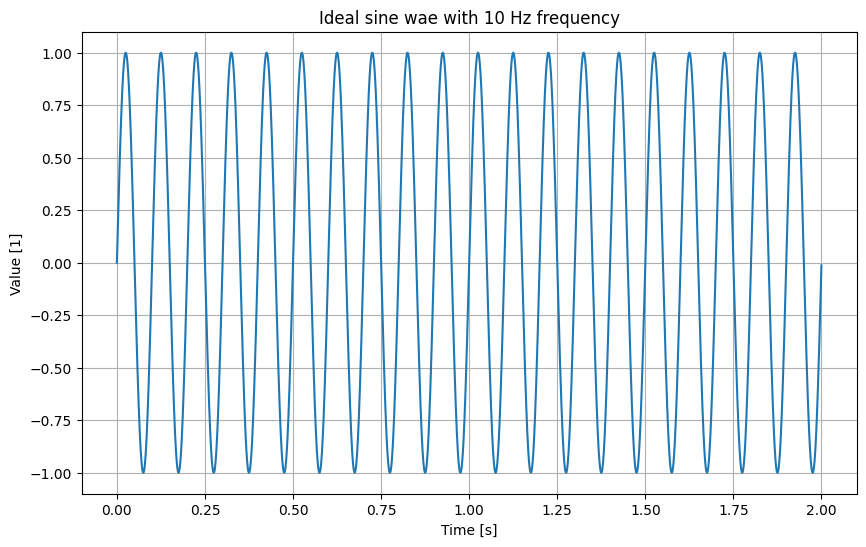

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(t, x)
plt.title(f'Ideal sine wae with {f} Hz frequency')
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Value [1]')
plt.show()

In [4]:
from scipy.io import wavfile

sample_rate, wave_data = wavfile.read('BAK.wav')

# Extract 1 second of data
duration = 1  # seconds
num_samples = sample_rate * duration
time = np.linspace(0, duration, num_samples, endpoint=False)

# If stereo, take one channel
if wave_data.ndim > 1:
    wave_data = wave_data[:, 0]  

/tmp/ipykernel_15291/3643940945.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, wave_data = wavfile.read('BAK.wav')


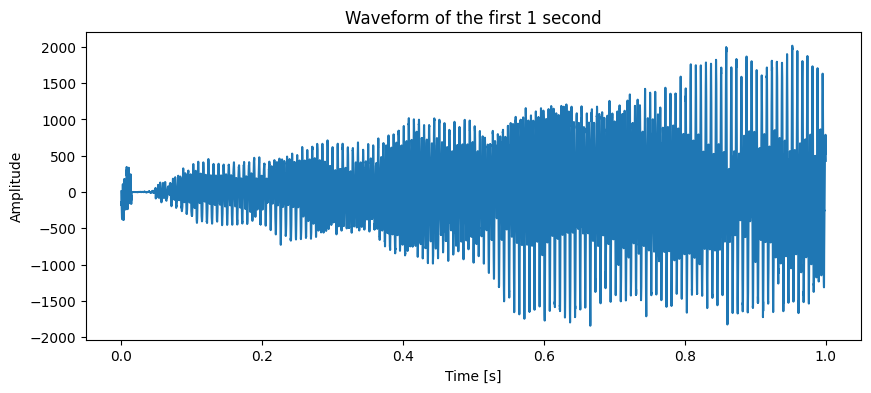

In [5]:
# Plot
plt.figure(figsize=(10, 4))
plt.plot(time, wave_data[:num_samples])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Waveform of the first 1 second")
plt.show()

In [6]:
with open('data.csv', 'w', newline='') as csvfile:
    file_writer = csv.writer(csvfile, delimiter=',')
    file_writer.writerow(['Time', 'Value'])
    for idx in range(len(time)):
        file_writer.writerow([time[idx], wave_data[idx]])

In [7]:
data = []

with open('data.csv', 'r') as csvfile:
    file_reader = csv.reader(csvfile, delimiter=',')

    header = next(file_reader)
    print('Header:', header)

    for row in file_reader:
        data.append([float(row[0]), float(row[1])])

data = np.array(data)


Header: ['Time', 'Value']


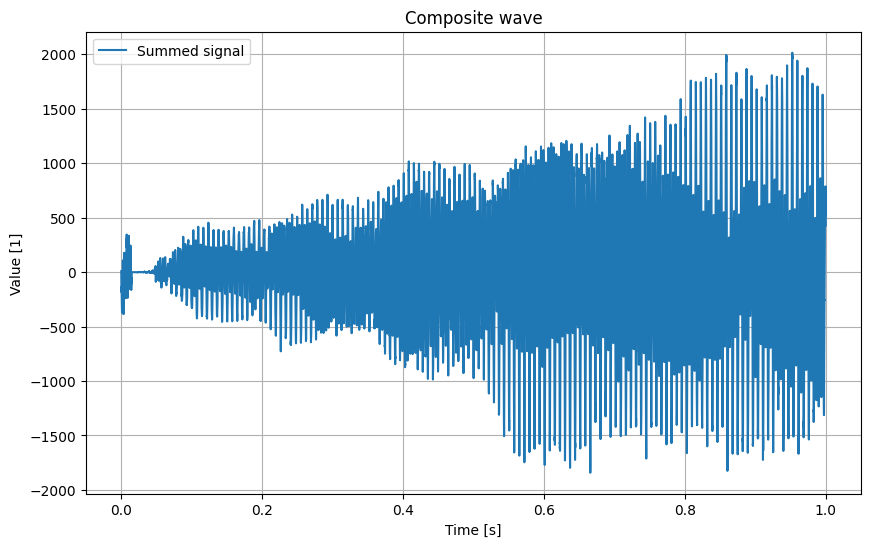

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data[:, 0], data[:, 1], label='Summed signal')
plt.title('Composite wave')
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Value [1]')
plt.legend()
plt.show()


In [9]:
df = pd.read_csv('data.csv')

print('Header:', df.columns.tolist())

data_array = df.to_numpy()
print(f"Shape of data {data_array.shape}")

Header: ['Time', 'Value']
Shape of data (44100, 2)


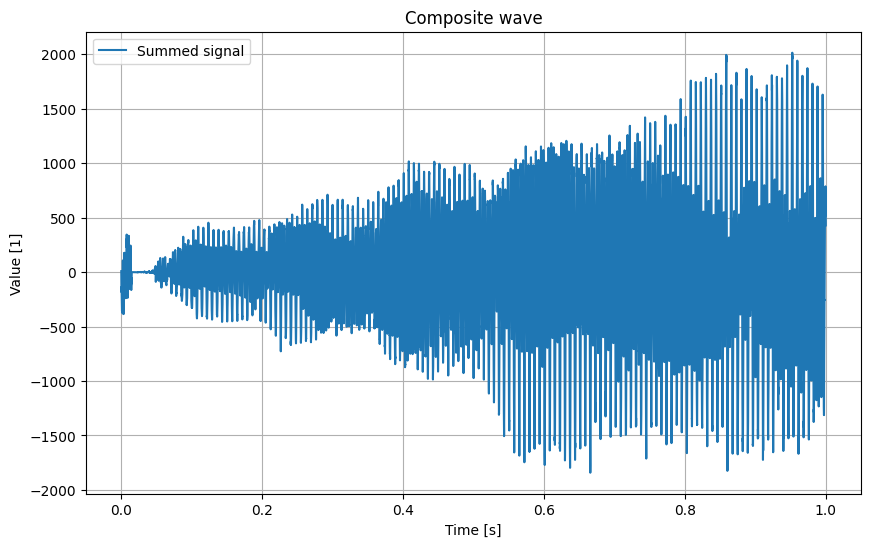

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data_array[:, 0], data_array[:, 1], label='Summed signal')
plt.title('Composite wave')
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Value [1]')
plt.legend()
plt.show()

In [11]:
df = pd.read_csv('samples.csv')

print('Header:', df.columns.tolist())

df = df.drop(0)

# Convert the first column to time in seconds
df.iloc[:, 0] = df.iloc[:, 0].str.strip("'")  # Remove the extra quotes
df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: sum(float(t) * f for t, f in zip(x.split(":"), [60, 1])))

# Convert the rest of the columns to float
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

data_array = df.to_numpy()
print(f"Shape of data {data_array.shape}")

Header: ["'Elapsed time'", "'MLII'", "'V5'"]
Shape of data (3600, 3)


In [12]:
df

,'Elapsed time','MLII','V5'
1,0.0,-0.145,-0.065
2,0.003,-0.145,-0.065
3,0.006,-0.145,-0.065
4,0.008,-0.145,-0.065
5,0.011,-0.145,-0.065
...,...,...,...
3596,9.986,-0.385,-0.285
3597,9.989,-0.395,-0.285
3598,9.992,-0.39,-0.295
3599,9.994,-0.4,-0.29


In [13]:
data_array

array([[0.0, -0.145, -0.065],
       [0.003, -0.145, -0.065],
       [0.006, -0.145, -0.065],
       ...,
       [9.992, -0.39, -0.295],
       [9.994, -0.4, -0.29],
       [9.997, -0.405, -0.285]], shape=(3600, 3), dtype=object)

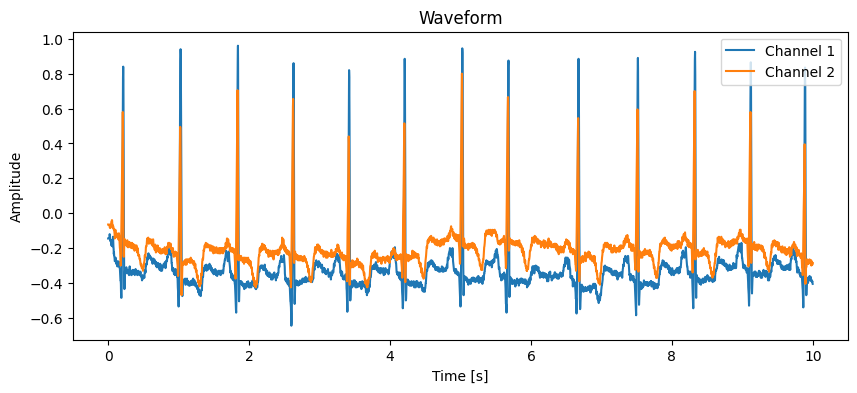

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(data_array[:, 0], data_array[:, 1], label='Channel 1')
plt.plot(data_array[:, 0], data_array[:, 2], label='Channel 2')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.legend()
plt.show()